Name : Prajakta Vijay Talole       
Capstone Project given by Utkarsh Sir


### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

 
from matplotlib.colors import ListedColormap
from sklearn import metrics  ##confusion matrix and accuracy
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('HR_Employee_Attrition_Data.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#data.describe()
data.shape

(2940, 35)

## EDA

Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

Get maximum insights from a data set
Uncover underlying structure
Extract important variables from the dataset
Detect outliers and anomalies(if any)
Test underlying assumptions
Determine the optimal factor settings

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [5]:
##To check whether there is any null value in the columns
data.isnull().sum()
#data.isnull().values.any()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

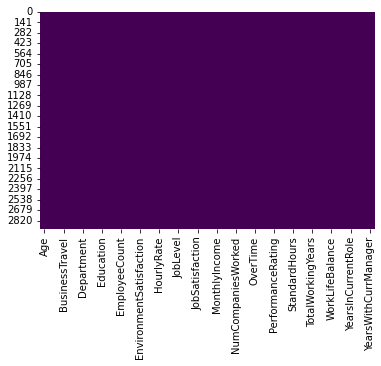

In [6]:
##To check whether there is any null value in the columns using heatmap
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
### To check for any characters like # $ % ? etc

# for col in data.columns:
#     print('{} : {}'.format(col,data[col].unique()))
    
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")


Attrition : ['Yes' 'No']
No     2466
Yes     474
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        2086
Travel_Frequently     554
Non-Travel            300
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    1922
Sales                      892
Human Resources            126
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       1212
Medical              928
Marketing            318
Technical Degree     264
Other                164
Human Resources       54
Name: EducationField, dtype: int64
________________________________________________________________

<AxesSubplot:>

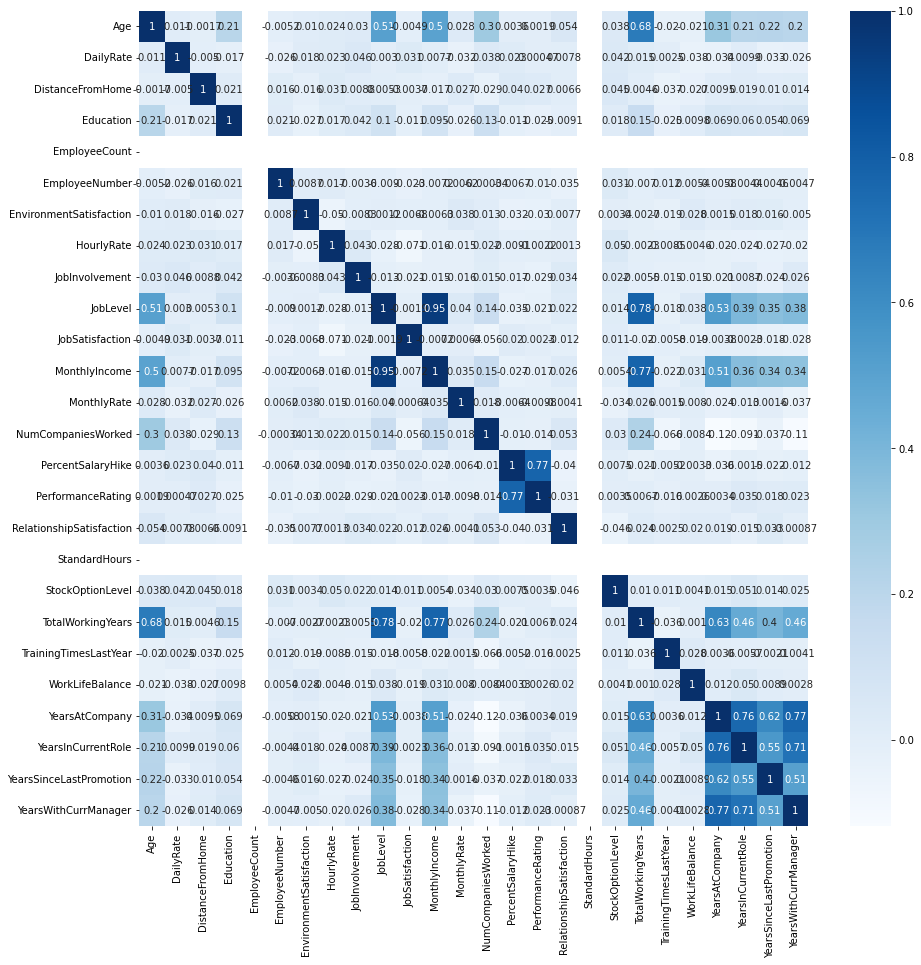

In [9]:
## Checking for correlation
fig=plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

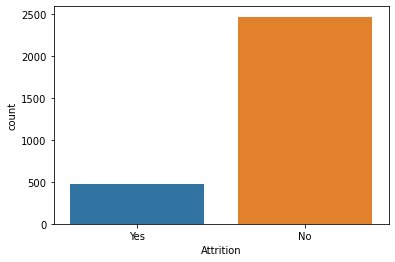

In [10]:
## plot of count of Attrition

sns.countplot(data['Attrition'])

<AxesSubplot:xlabel='Age', ylabel='count'>

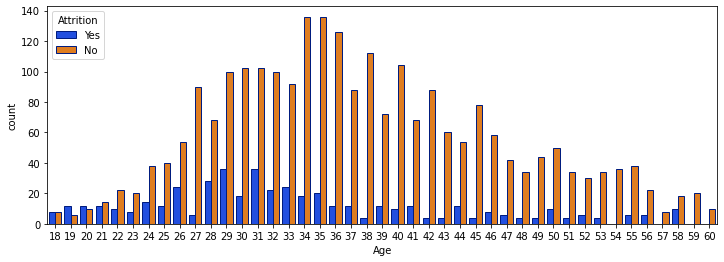

In [11]:
## Countplot of employees that left and stayed by Age

import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))

### employee having age 20 left more job

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

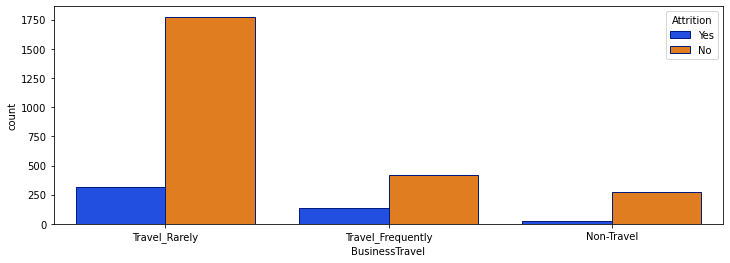

In [12]:
#Countplot of employees that left and stayed by business travel
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='BusinessTravel', hue='Attrition', data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1))

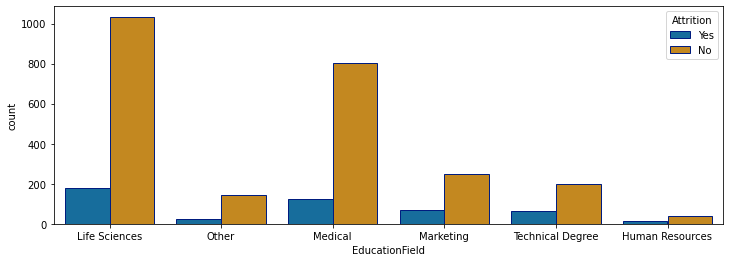

In [13]:
#Countplot of employees that left and stayed by Education field
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
#ax = axis
sns.countplot(x='EducationField', hue='Attrition', data = data, palette="colorblind", ax = ax, 
              edgecolor=sns.color_palette("dark", n_colors = 1));

#As we can see from this chart, most of the employees who left has Life Sciences education background.


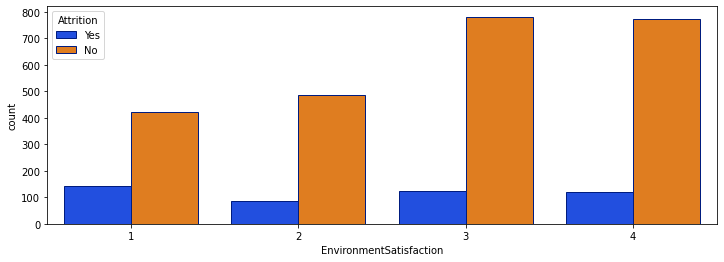

In [14]:
#Countplot of employees that left and stayed by Environment Satisfaction
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));

##As we can see from this chart most of the employees who left has Environment Satisfaction as 1

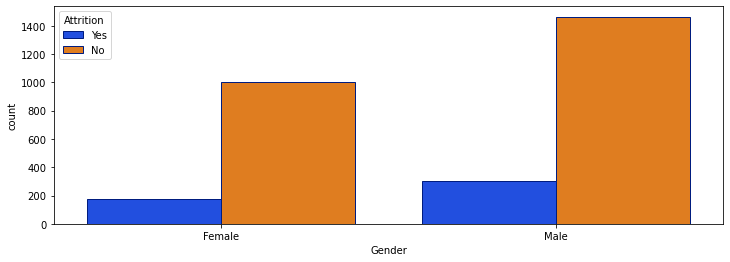

In [15]:
#Countplot of employees that left and stayed by Gender
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Gender', hue='Attrition', data = data, palette="bright", ax = ax, 
              edgecolor=sns.color_palette("dark", n_colors = 1));

## same for both male and femaleJoblevel

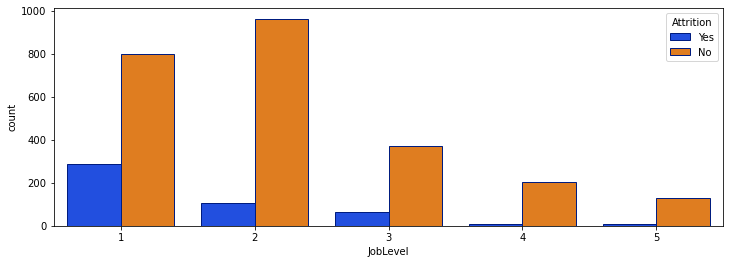

In [16]:
#Countplot of employees that left and stayed by Joblevel
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='JobLevel', hue='Attrition', data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));

## employees at job level 1 left more jobs

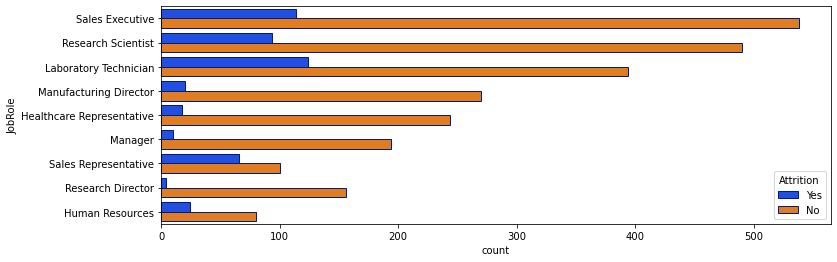

In [17]:
#Countplot of employees that left and stayed by Jobrole

fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(y='JobRole', hue='Attrition', data = data, palette="bright", ax = ax, 
              edgecolor=sns.color_palette("dark", n_colors = 1), orient='v');

## employees working as Sales Executive ,Lab Technician,Sales representative

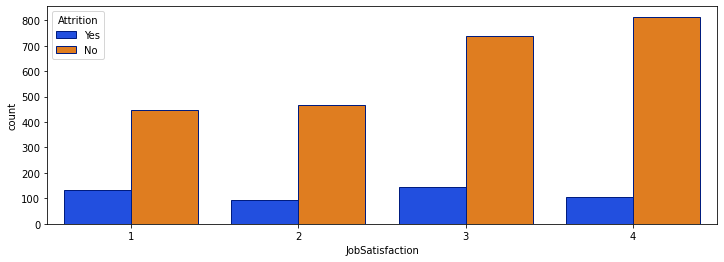

In [18]:
#Countplot of employees that left and stayed by Jobsatisfaction
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='JobSatisfaction', hue='Attrition', data = data, palette="bright", ax = ax,
              edgecolor=sns.color_palette("dark", n_colors = 1));
## Each category has employees who left

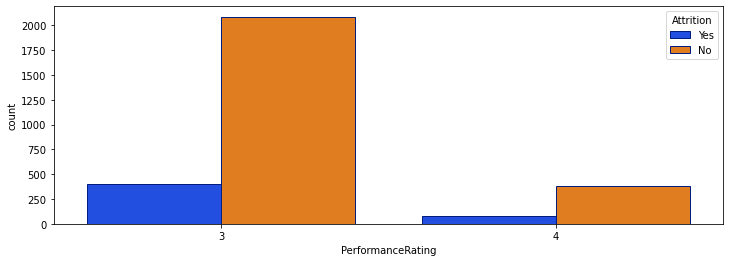

In [19]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='PerformanceRating', hue='Attrition', data = data, palette="bright", ax = ax,  
              edgecolor=sns.color_palette("dark", n_colors = 1));
## employees with low perfomance rating left

## Outlier Removal

Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EmployeeCount               AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
EmployeeNumber                 AxesSubplot(0.125,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
HourlyRate                   AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
JobLevel                    AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
JobSatisfaction                AxesSubplot(0.125,0.566951;0.133621x0.0920732)
MonthlyIncome               AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
MonthlyRate                  AxesSubplot(0.44569,0.566951;0.1336

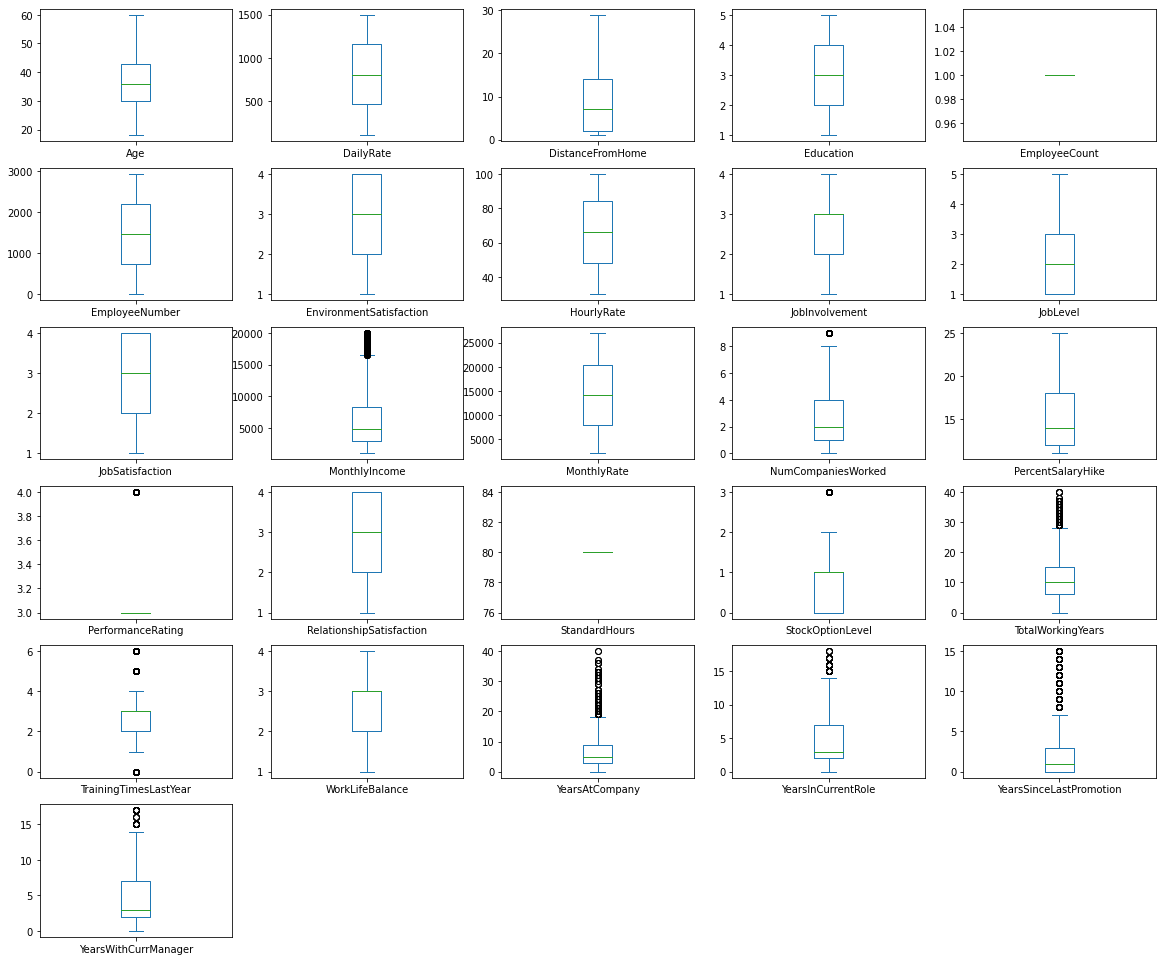

In [20]:
data.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

In [21]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

IQR_outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 
IQR_outliers

Age                            13.0
DailyRate                     692.0
DistanceFromHome               12.0
Education                       2.0
EmployeeCount                   0.0
EmployeeNumber               1469.5
EnvironmentSatisfaction         2.0
HourlyRate                     36.0
JobInvolvement                  1.0
JobLevel                        2.0
JobSatisfaction                 2.0
MonthlyIncome                5469.0
MonthlyRate                 12417.0
NumCompaniesWorked              3.0
PercentSalaryHike               6.0
PerformanceRating               0.0
RelationshipSatisfaction        2.0
StandardHours                   0.0
StockOptionLevel                1.0
TotalWorkingYears               9.0
TrainingTimesLastYear           1.0
WorkLifeBalance                 1.0
YearsAtCompany                  6.0
YearsInCurrentRole              5.0
YearsSinceLastPromotion         3.0
YearsWithCurrManager            5.0
dtype: float64


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,7,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,8,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2928,...,2,80,3,20,2,3,5,3,0,2
2928,35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2929,...,4,80,1,4,5,3,4,3,1,1
2932,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2933,...,1,80,1,21,2,2,20,9,9,6
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7


In [22]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,12,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2934,...,2,80,0,10,2,3,9,4,1,7
2934,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2935,...,4,80,0,5,2,3,4,2,0,0
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


Age                            AxesSubplot(0.125,0.787927;0.133621x0.0920732)
DailyRate                   AxesSubplot(0.285345,0.787927;0.133621x0.0920732)
DistanceFromHome             AxesSubplot(0.44569,0.787927;0.133621x0.0920732)
Education                   AxesSubplot(0.606034,0.787927;0.133621x0.0920732)
EmployeeCount               AxesSubplot(0.766379,0.787927;0.133621x0.0920732)
EmployeeNumber                 AxesSubplot(0.125,0.677439;0.133621x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.285345,0.677439;0.133621x0.0920732)
HourlyRate                   AxesSubplot(0.44569,0.677439;0.133621x0.0920732)
JobInvolvement              AxesSubplot(0.606034,0.677439;0.133621x0.0920732)
JobLevel                    AxesSubplot(0.766379,0.677439;0.133621x0.0920732)
JobSatisfaction                AxesSubplot(0.125,0.566951;0.133621x0.0920732)
MonthlyIncome               AxesSubplot(0.285345,0.566951;0.133621x0.0920732)
MonthlyRate                  AxesSubplot(0.44569,0.566951;0.1336

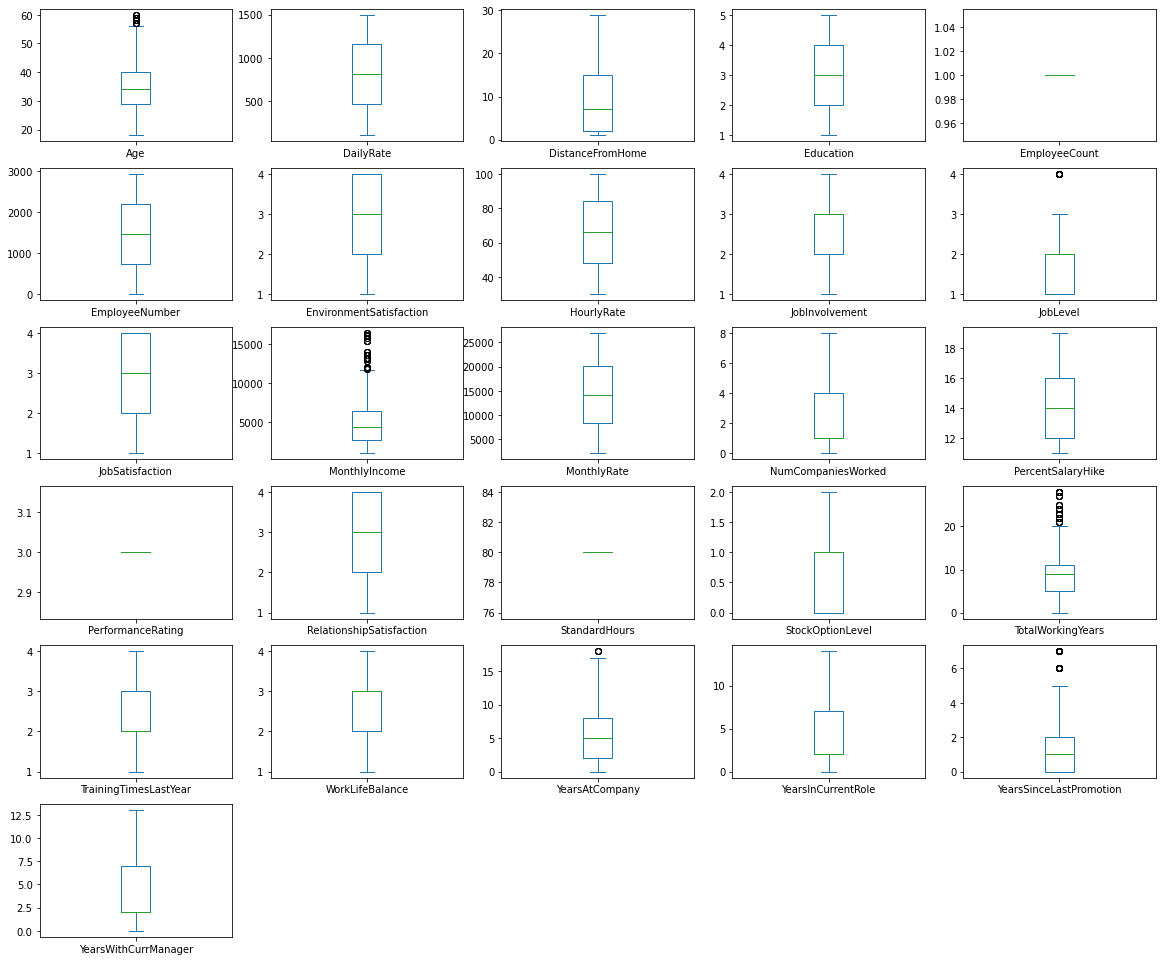

In [23]:
data.plot(kind="box", subplots=True, layout=(7,5),figsize=(20,20))

In [24]:
# import numpy as np
# import pandas as pd 
# import scipy.stats as stats

# #find absolute value of z-score for each observation
# z = np.abs(stats.zscore(data))


# # #only keep rows in dataframe with all z-scores less than absolute value of 3 
# data_clean = data[(z<3).all(axis=1)]

# # #find how many rows are left in the dataframe 
# data_clean.shape
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,6,...,3,80,0,8,2,2,7,7,3,6
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,10,...,2,80,2,17,3,2,7,7,7,7
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,12,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2934,...,2,80,0,10,2,3,9,4,1,7
2934,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2935,...,4,80,0,5,2,3,4,2,0,0
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


In [25]:
# ### Quantile method
# Q1=data.quantile(0.25)
# Q3=data.quantile(0.75)

In [26]:
# dt=data.where(data<Q3,other=Q3,axis=1)
# dt

In [27]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [28]:
y=data['Attrition'].values
y

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [29]:
X=data.loc[:,['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].values

## Label Encoder

In [30]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df["Age"] = le.fit_transform(res_df["Age"])
    res_df["BusinessTravel"] = le.fit_transform(res_df["BusinessTravel"])
    res_df["DailyRate"] = le.fit_transform(res_df["DailyRate"])
    res_df["Department"] = le.fit_transform(res_df["Department"])
    res_df["DistanceFromHome"] = le.fit_transform(res_df["DistanceFromHome"])
    res_df["EducationField"] = le.fit_transform(res_df["EducationField"])
    res_df["EmployeeCount"] = le.fit_transform(res_df["EmployeeCount"])
    res_df["EmployeeNumber"] = le.fit_transform(res_df["EmployeeNumber"])
    res_df["EnvironmentSatisfaction"] = le.fit_transform(res_df["EnvironmentSatisfaction"])
    res_df["Gender"] = le.fit_transform(res_df["Gender"])
    res_df["HourlyRate"] = le.fit_transform(res_df['HourlyRate'])
    res_df["JobLevel"] = le.fit_transform(res_df["JobLevel"])
    res_df["JobInvolvement"] = le.fit_transform(res_df["JobInvolvement"])
    res_df["JobRole"] = le.fit_transform(res_df["JobRole"])
    res_df["MaritalStatus"] = le.fit_transform(res_df["MaritalStatus"])
    res_df["MonthlyIncome"] = le.fit_transform(res_df["MonthlyIncome"])
    res_df["OverTime"] = le.fit_transform(res_df["OverTime"])
    res_df["MonthlyRate"] = le.fit_transform(res_df["EducationField"])
    res_df["NumCompaniesWorked"] = le.fit_transform(res_df["NumCompaniesWorked"])
    res_df["Over18"] = le.fit_transform(res_df["Over18"])
    res_df["PercentSalaryHike"] = le.fit_transform(res_df["PercentSalaryHike"])
    res_df["PerformanceRating"] = le.fit_transform(res_df["PerformanceRating"])
    res_df["RelationshipSatisfaction"] = le.fit_transform(res_df['RelationshipSatisfaction'])
    res_df["StandardHours"] = le.fit_transform(res_df["StandardHours"])
    res_df["StockOptionLevel"] = le.fit_transform(res_df['StockOptionLevel'])
    res_df["TotalWorkingYears"] = le.fit_transform(res_df["TotalWorkingYears"])
    res_df["TrainingTimesLastYear"] = le.fit_transform(res_df["TrainingTimesLastYear"])
    res_df["WorkLifeBalance"] = le.fit_transform(res_df["WorkLifeBalance"])
    res_df["YearsAtCompany"] = le.fit_transform(res_df["YearsAtCompany"])
    res_df["YearsInCurrentRole"] = le.fit_transform(res_df["YearsInCurrentRole"])
    res_df["YearsSinceLastPromotion"] = le.fit_transform(res_df["YearsSinceLastPromotion"])
    res_df["YearsWithCurrManager"] = le.fit_transform(res_df["YearsWithCurrManager"]) 
    
    res_df["Attrition"] = le.fit_transform(res_df["Attrition"])
    return res_df

In [31]:
encoded_df = preprocessor(data)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,19,1,2,547,1,1,2,4,0,0,...,1,0,0,7,2,2,0,0,0,0
3,15,0,1,553,1,2,4,1,0,1,...,2,0,0,8,2,2,8,7,3,0
5,14,0,1,390,1,1,2,1,0,2,...,2,0,0,8,1,1,7,7,3,6
9,18,0,2,510,1,26,3,3,0,3,...,1,0,2,17,2,1,7,7,7,7
11,11,0,2,27,1,14,2,1,0,4,...,3,0,0,10,2,2,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,13,0,0,96,1,4,3,3,0,1553,...,1,0,0,10,1,2,9,4,1,7
2934,8,0,2,448,2,4,3,4,0,1554,...,3,0,0,5,1,2,4,2,0,0
2935,18,0,1,335,1,22,2,3,0,1555,...,2,0,1,17,2,2,5,2,0,3
2938,31,0,1,395,2,1,3,3,0,1556,...,3,0,0,17,2,1,9,6,0,8


In [32]:
#encoded_df.dtypes

In [33]:




X=encoded_df.loc[:,['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].values


In [34]:
y=encoded_df['Attrition'].values
y



array([1, 0, 0, ..., 0, 0, 0])

In [35]:
######## Standard Scaler

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
## scaling is done to convert the data into standard form 
standard_scaler=StandardScaler()     ## instanciation  
X_train=standard_scaler.fit_transform(X_train)  ## fit and transfrom both on training set
X_test=standard_scaler.transform(X_test)    ## only transform on testing set once we have fitted on training set

In [69]:

classifier = KNeighborsClassifier(n_neighbors=25)  
classifier.fit(X_train, y_train) 


KNeighborsClassifier(n_neighbors=25)

## Predictions & Evaluations

In [70]:
y_pred = classifier.predict(X_test)  
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[250   0]
 [ 59   3]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       250
           1       1.00      0.05      0.09        62

    accuracy                           0.81       312
   macro avg       0.90      0.52      0.49       312
weighted avg       0.85      0.81      0.74       312



In [76]:
y_pred_train = classifier.predict(X_train) 
print("Accuracy Training:",metrics.accuracy_score(y_pred_train,y_train))
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy Training: 0.8386837881219904
Accuracy: 0.8108974358974359
Precision: 1.0
Recall: 0.04838709677419355


In [72]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[250,   0],
       [ 59,   3]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

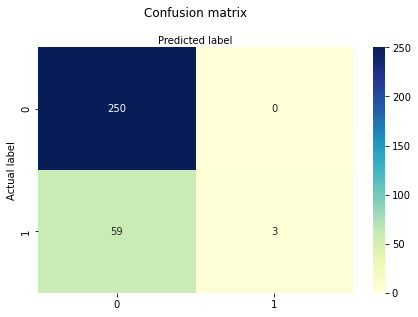

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Detection of Optimal Value for K Neighnours

In [53]:
error = []

# Calculating error for K values between 1 and 60
for i in range(1, 60):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
error

[0.038461538461538464,
 0.14423076923076922,
 0.16346153846153846,
 0.16346153846153846,
 0.16987179487179488,
 0.1762820512820513,
 0.1762820512820513,
 0.17307692307692307,
 0.1794871794871795,
 0.1794871794871795,
 0.1762820512820513,
 0.1794871794871795,
 0.1762820512820513,
 0.1858974358974359,
 0.1794871794871795,
 0.19230769230769232,
 0.1858974358974359,
 0.1858974358974359,
 0.18269230769230768,
 0.1891025641025641,
 0.1858974358974359,
 0.1891025641025641,
 0.1858974358974359,
 0.1891025641025641,
 0.1891025641025641,
 0.1891025641025641,
 0.1891025641025641,
 0.19230769230769232,
 0.1891025641025641,
 0.1891025641025641,
 0.1891025641025641,
 0.19230769230769232,
 0.1891025641025641,
 0.19230769230769232,
 0.19230769230769232,
 0.1987179487179487,
 0.1987179487179487,
 0.1987179487179487,
 0.1955128205128205,
 0.1987179487179487,
 0.1987179487179487,
 0.1987179487179487,
 0.1955128205128205,
 0.1987179487179487,
 0.1987179487179487,
 0.1987179487179487,
 0.1987179487179487,


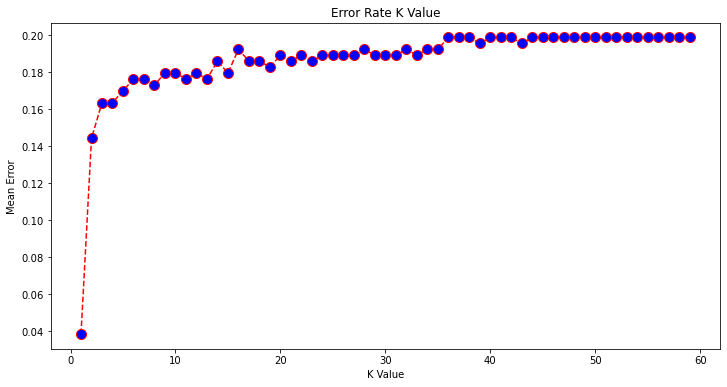

In [54]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 60), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()